In [5]:
json_file = "/workspaces/arcprize2025/datas/arc-agi_training_challenges.json"
# json_file = r"C:\Users\UT00YBG3\Documents\arcprize2025\datas\arc-agi_training_challenges.json"

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open(json_file, 'r') as file:
    data = json.load(file)

def plot_grid(grid, title=""):
    """
    Plots a single 2D grid using matplotlib.
    
    Parameters:
    - grid: List of lists of integers.
    - title: Optional title for the plot.
    """
    grid_array = np.array(grid)
    plt.figure(figsize=(2, 2))
    plt.imshow(grid_array, cmap='tab20', interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:
example = data['00576224']["train"][0]
example

{'input': [[7, 9], [4, 3]],
 'output': [[7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3],
  [9, 7, 9, 7, 9, 7],
  [3, 4, 3, 4, 3, 4],
  [7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3]]}

In [10]:
data['00576224']

{'train': [{'input': [[7, 9], [4, 3]],
   'output': [[7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3],
    [9, 7, 9, 7, 9, 7],
    [3, 4, 3, 4, 3, 4],
    [7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3]]},
  {'input': [[8, 6], [6, 4]],
   'output': [[8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4],
    [6, 8, 6, 8, 6, 8],
    [4, 6, 4, 6, 4, 6],
    [8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4]]}],
 'test': [{'input': [[3, 2], [7, 8]]}]}

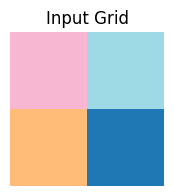

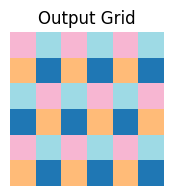

In [8]:
plot_grid(example["input"], title="Input Grid")
plot_grid(example["output"], title="Output Grid")

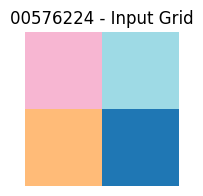

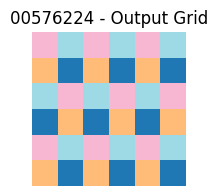

Input grid shape: (2, 2)
Output grid shape: (6, 6)
Input grid:
 [[7 9]
 [4 3]]
Output grid:
 [[7 9 7 9 7 9]
 [4 3 4 3 4 3]
 [9 7 9 7 9 7]
 [3 4 3 4 3 4]
 [7 9 7 9 7 9]
 [4 3 4 3 4 3]]


In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# === Load ARC JSON Dataset ===
json_file = Path(r"C:\Users\UT00YBG3\Documents\arcprize2025\datas\arc-agi_training_challenges.json")

with open(json_file, 'r') as file:
    arc_dataset = json.load(file)

# === Utility to Plot a Grid ===
def plot_grid(grid: list[list[int]], title: str = "") -> None:
    """Plots a single 2D grid using matplotlib.

    Args:
        grid (list[list[int]]): A 2D grid of integers.
        title (str): Title to display above the grid.
    """
    grid_array = np.array(grid)
    plt.figure(figsize=(2, 2))
    plt.imshow(grid_array, cmap="tab20", interpolation="nearest")
    plt.title(title)
    plt.axis("off")
    plt.show()

# === Choose a Puzzle to Run ===
puzzle_id = "00576224"
puzzle_data = arc_dataset[puzzle_id]
example = puzzle_data["train"][0]

input_grid = np.array(example["input"])
output_grid = np.array(example["output"])

# === Visualize Input and Output Grids ===
plot_grid(input_grid, title=f"{puzzle_id} - Input Grid")
plot_grid(output_grid, title=f"{puzzle_id} - Output Grid")

# === Preview Shapes and Grids ===
print("Input grid shape:", input_grid.shape)
print("Output grid shape:", output_grid.shape)
print("Input grid:\n", input_grid)
print("Output grid:\n", output_grid)


In [27]:
import numpy as np
import logging
import sys
from pathlib import Path

sys.path.append()

from .sources.synthesis_engine import SynthesisEngine

ImportError: attempted relative import with no known parent package